In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

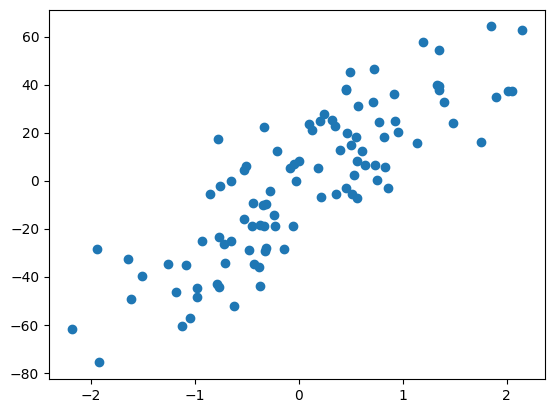

In [49]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [54]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [55]:
y_pred =lr.predict(X_test)

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test,y_pred)

0.6345158782661012

In [58]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.6375011587464419

In [59]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X,y):
        # calculate the b usig GD
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)
            
        print(self.b,self.m)
     
    def predict(self,X):
        return self.m*X+self.b

In [60]:
gd = GDRegressor(0.001,50)

In [61]:
gd.fit(X,y)

-2.2991839308293196 27.837060471820052


In [62]:
gd.predict(X)

array([[-22.13004587],
       [-14.46803398],
       [-14.93031641],
       [ 24.22481941],
       [  4.3220791 ],
       [ 21.67440917],
       [ -9.07267152],
       [  2.84916767],
       [-22.36969544],
       [-14.266255  ],
       [ 53.79864004],
       [  8.75884689],
       [  3.48535872],
       [ -8.76923699],
       [-23.69550079],
       [ 10.31541979],
       [ 15.51330493],
       [  7.70913832],
       [-47.25904197],
       [ 46.39456556],
       [-24.26231913],
       [-16.55078722],
       [-28.14130775],
       [ 57.56115677],
       [ -8.07119002],
       [-47.92672634],
       [-11.72532075],
       [-11.26615965],
       [-15.69914914],
       [-16.86253782],
       [ 17.79820103],
       [ 19.02152826],
       [ 10.32439521],
       [-37.41858492],
       [-63.18204405],
       [-35.29775901],
       [  3.75403106],
       [ 34.73292872],
       [-32.56312362],
       [ 13.35252918],
       [-44.41234489],
       [ -2.36568738],
       [-10.04163129],
       [ 10

In [64]:
gd.fit(X_train,y_train)

-2.2709893455389714 28.125891702177178


In [65]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345162275128353

In [67]:
b=-120       #150
m=100       #-127.82
lr=0.001
all_b=[]
all_m=[]
all_cost=[]

epochs = 30

for i in range(epochs):
    slope_b=0
    slope_m=0
    cost=0
    for j in range(X.shape[0]):
        slope_b=slope_b-2*(y[j]-(m*X[j])-b)
        slope_m=slope_m-2*(y[j]-(m*X[j])-b)*X[j]

        cost =cost+(y[j]-m*X[j]-b)**2



    b=b-(lr*slope_b)
    m=m-(lr*slope_m)

    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)



NameError: name 'FuncAnimation' is not defined

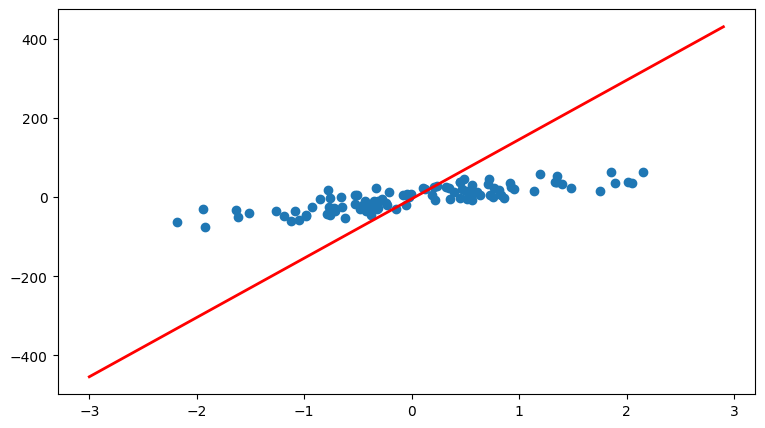

In [69]:
fig,ax=plt.subplots(figsize=(9,5))

x_i=np.arange(-3,3,0.1)
y_i=x_i*(-27)-150

ax.scatter(X,y)

line, = ax.plot(x_i,x_i*150-4,'r-',linewidth=2)

def update(i):
    label='epoch{0}'.format(i+1)
    line.set_ydata(x_i*all_m[i]+all_b[i])
    ax.set_xlabel(label)


anim = FuncAnimation(fig,update,repeat=True,frames=epochs,intervals=500)